In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#choosing Annual income and spending score columns for segmentation
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
#choosing number of clusters...elbow method

sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

Text(0, 0.5, 'sum of squared error')

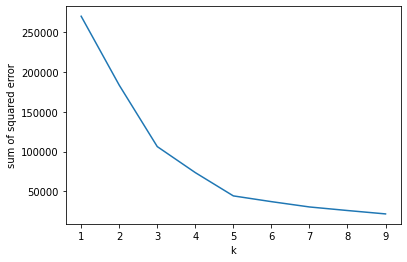

In [11]:
plt.plot(k_range, sse)
plt.xlabel('k')
plt.ylabel('sum of squared error')

In [12]:
#k=5

In [13]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(X)
y_predicted

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [14]:
X['cluster'] = y_predicted
X.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0


In [15]:
km.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

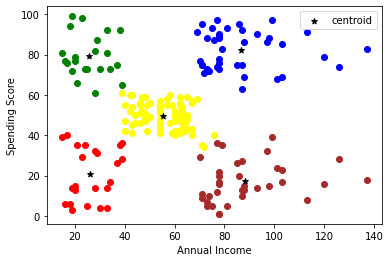

In [17]:
df0 = X[X.cluster==0]
df1 = X[X.cluster==1]
df2 = X[X.cluster==2]
df3 = X[X.cluster==3]
df4 = X[X.cluster==4]
plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'],color='red')
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='blue')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='yellow')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='green')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='brown')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()